<a href="https://colab.research.google.com/github/LuisMig-code/Detector-de-perfis-fakes-do-instagram/blob/main/fake_profile_detector_on_instagram.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Fakes Profile Detector on Instagram**

[Para ler em Português clique aqui (to read in Portuguese click here)](https://github.com/LuisMig-code/Detector-de-perfis-fakes-do-instagram/blob/main/Detector_de_perfis_fake_no_instagram_PTBR.ipynb)

Created in 2010, Instagram is today one of the largest social networks in the world, occupying the [6th position](https://www.maioresemelhores.com/maiores-redes-sociais-do-mundo/) with more than 1 billion downloads, allowing users to share photos and videos. In addition, it stands out for the possibility of creating online "businesses" for the sale of products or services. Instagram has several features, and its relevance to the world technology market is not out of the question!

<img src="https://images.pexels.com/photos/174938/pexels-photo-174938.jpeg?cs=srgb&dl=pexels-energepiccom-174938.jpg&fm=jpg" width='500px' align="center">

## Let's think!
### Understanding the Problem

<img src="https://image.freepik.com/vetores-gratis/equipe-de-gerentes-de-crise-resolvendo-problemas-do-empresario-funcionarios-com-emaranhado-de-desvendamento-de-lampada-ilustracao-vetorial-para-trabalho-em-equipe-solucao-conceito-de-gestao_74855-10162.jpg">

If you are an Instagram user, you have certainly received requests or messages from random profiles, where they are usually people posting dangerous links.

They are in fact a danger to users and for that Instagram has an anti-spam system (that is, a system that detects these fakes profiles and prevents them from sending requests to users) to avoid problems.

Based on that, what we will do today will be to replicate that same system using Machine Learning in order to provide a model that can prevent an average user from receiving messages and requests.

## What about our data?
### importing the data

The data we will use is available on the [Kaggle](https://www.kaggle.com/free4ever1/instagram-fake-spammer-genuine-accounts) website, where you can find complete descriptions of the data.

Data is available for us both to use in training our Machine Learning model and to test its quality (accuracy).

Let's start by importing the libraries needed for our analysis

**First of all, I would like to point out that some variables and comments in this notebook are in my native language, that is, Brazilian Portuguese**

In [1]:
# importing the necessary packages

import pandas as pd
import numpy as np
import seaborn as sns
sns.set_theme()
import matplotlib.pyplot as plt


# importing the necessary packages into the Machine Learning model
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier

In [2]:
link_teste = "https://www.dropbox.com/s/ap90v0bu9td4k4y/test.csv?dl=1"
link_treino = "https://www.dropbox.com/s/uanezjf9y1xb2te/train.csv?dl=1"

In [4]:
df_teste = pd.read_csv(link_teste)
df_treino = pd.read_csv(link_treino)

### Let's understand our data a little better

It is interesting that in the beginning we know some information about our data, such as data types, whether it has null values and the correlation of the data.

However, it is important that we know the variables that we have at our disposal and what they mean, for this, I prepared a kind of summary to obtain such information.

**Features Dictionary**:

1.   **profile pic** : do you have a profile picture or not? (0 for "doesn't have" and 1 for "has")
2.   **nums/lenght username** : proportion of the number of numeric characters in the username in relation to its length
3.   **fulname words** : full name in number of words
4.   **num/lenght fullname** : relationship between the number of numeric characters in the full name and its length
5.   **name==username** : is the username the same as the full name registered? (1 for true and 0 for false)
6.   **description length** : number of characters in Bio
7.   **external URL** : has external URL in Bio or not
8.   **private** : o perfil é privado ? (1 para sim e 0 para não)
9.   **#posts** : number of publications
10.  **#followers** : number of followers
11.  **#follows** : number of profiles the user follows
12.  **fake** : 0 for "is not fake" and 1 for "is fake". **`target variable`**

In possession of this information, we can proceed with our pre-analyzes

In [5]:
# Tipos de dados
df_treino.dtypes

profile pic               int64
nums/length username    float64
fullname words            int64
nums/length fullname    float64
name==username            int64
description length        int64
external URL              int64
private                   int64
#posts                    int64
#followers                int64
#follows                  int64
fake                      int64
dtype: object

In [7]:
print("Null Values for our Training Dataset::\n")
df_treino.isnull().sum()

Null Values for our Training Dataset::



profile pic             0
nums/length username    0
fullname words          0
nums/length fullname    0
name==username          0
description length      0
external URL            0
private                 0
#posts                  0
#followers              0
#follows                0
fake                    0
dtype: int64

In [8]:
print("Null Values for our test Dataset:\n")
df_teste.isnull().sum()

Null Values for our test Dataset:



profile pic             0
nums/length username    0
fullname words          0
nums/length fullname    0
name==username          0
description length      0
external URL            0
private                 0
#posts                  0
#followers              0
#follows                0
fake                    0
dtype: int64

In [9]:
# correlação entre nossos dados
print("correlation between our data")
df_treino.corr()[["fake"]]

correlation between our data


,fake
profile pic,-0.637315
nums/length username,0.587687
fullname words,-0.298793
nums/length fullname,0.246782
name==username,0.170695
description length,-0.460825
external URL,-0.362809
private,-0.028586
#posts,-0.245355
#followers,-0.093689


In general, our data is made up of number values, we don't have any columns that have values of type "str" (ie text), this is important when choosing the model.

We also noticed that we have no null values in any of our columns

Finally, we saw the correlations between our data, it would be more interesting to see it in the form of a graph. Shall we start our graphical analysis?

### Viewing our data

Let's start by visualizing our correlation from a heat graph

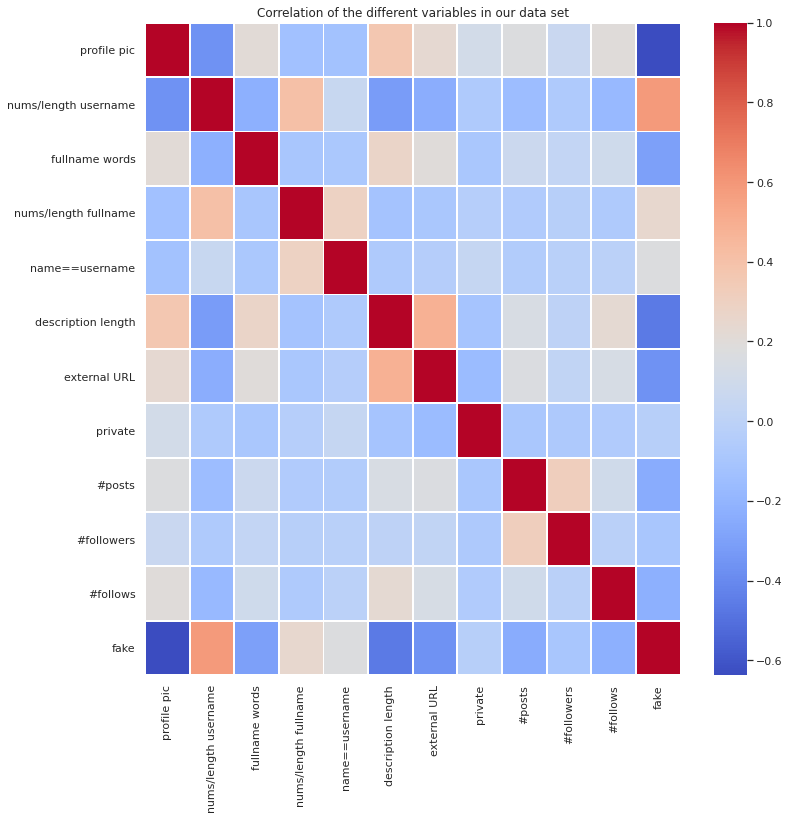

In [10]:
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(df_treino.corr(), cmap='coolwarm', ax=ax , linewidths=.9)
ax.set_title("Correlation of the different variables in our data set")
plt.show()

Furthermore, it is important that we know the proportion of the data in our DataFrame. Let's plot a graph that shows the amount of fakes and not fake in our training data

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


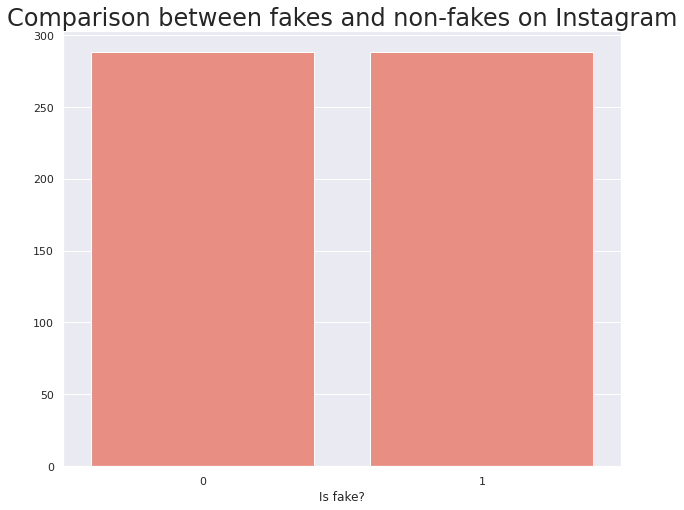

In [12]:
ax = plt.figure(figsize=(10,8))
ax = sns.countplot(df_treino.fake , color="salmon")
ax.set_title("Comparison between fakes and non-fakes on Instagram" , fontsize=24 , loc="center")
ax.set_xlabel("Is fake?")
ax.set_ylabel("")
ax = ax

We have equal proportions of data! This is very interesting to prevent our Machine Learning model from being biased towards any given result

## Machine Learning
### Shall we start our predictions?

First of all, I would like to make some **initial reservations** :

**1)** We will have 2 sets of data that have been previously made available: the **training data and the test data**, therefore, there will be no need to make previous divisions of the data.

**2)** I will use 3 main algorithms: **Random Forest Classifier**, **Linear SVC** and **KNeigbours Classifier**, and from them we will decide which is the best.

**3)** I will not make any in-depth explanation of the classifiers, just a few observations about them.

<br>
<br>

<img src="https://i.giphy.com/media/CjmvTCZf2U3p09Cn0h/200.webp">

**Come on?**

### Processing our data:

Anteriormente disso que não faríamos nenhuma divisão de dados de treino e teste pois já fora nos disponibilizados, entretante , ainda há a necessidade de embaralharmos nossos dados , evitando qualquer viés do nosso modelo de predição. Para isso usaremos o atributo `sample()` da biblioteca *pandas*.



In [13]:
# misturando os dados 
df_treino = df_treino.sample(df_treino.shape[0],random_state=28)

df_teste = df_teste.sample(df_teste.shape[0],random_state=28)

That done, let's think more!

What normally occurs in Machine Learning models is the need to scale the data, I will not go into the merit of explaining such functionality in detail, but I think it is important that we know whether or not there is a need.

Many of our data are True or False (1 or 0) and small values, with decimal places (for example, 0.33). Starting from this point, **I decided not to do any data scaling** and stayed with them the way they came

### Training and test data

The next step is to separate our target variable (Y) and features (X) into different data sets, both for training and testing, in order to start training our Machine Learning model.

In [14]:
# dados de treino
X_treino = df_treino.drop(["fake"] , axis=1)
y_treino = df_treino["fake"]

# dados de teste
X_teste = df_teste.drop(["fake"] , axis=1)
y_teste = df_teste["fake"]

### Hands On!
#### Let's put our hands to work and actually start creating our model

#### Random Forest Classifier

The Random Forest Classifier is the first of the algorithms that we will be testing.

Well known for being robust and efficient, it is also multi-tasking and can serve both as a Classifier and as a Regressor.

In general, the RFC combines several decision trees (another ML algorithm) and forms, as the name says, a forest.

As I said earlier, I will not go into details about the logic of the algorithm, if you want to know more [click here](https://massivefile.com/randomforestclassifier/) and read a full article on the topic.

In [15]:
modelo = RandomForestClassifier(n_estimators=120 , random_state=28  , max_depth = 100 , max_samples = 350)
modelo.fit(X_treino,y_treino)

predicoes = modelo.predict(X_teste)

print("The average accuracy rate of the model with tuning was:",accuracy_score(y_teste,predicoes))
print(classification_report(y_teste,predicoes))

The average accuracy rate of the model with tuning was: 0.925
              precision    recall  f1-score   support

           0       0.92      0.93      0.93        60
           1       0.93      0.92      0.92        60

    accuracy                           0.93       120
   macro avg       0.93      0.93      0.92       120
weighted avg       0.93      0.93      0.92       120



With the RFC we obtained an average precision of our model of **0.925**. In the end we can see that 92% of the time the model hits it is not fake and 93% of the time it hits it was fake. The result is quite interesting! 

#### Linear SVC

LinearSVC basically tries to create an equation by drawing a line on a plane, which aims to divide our data into the two possible classifications (0 or 1), as shown in the image:

<img src="https://pythonprogramming.net/static/images/svm/machine-learning-support-vector-machine-linear-svc-example-with-python-and-sklearn-1024x584.png" width=700>

Note that the points on the plane are the data and that the line divides that data into two possible classifications!

If you want to know more, access [this article](https://pythonprogramming.net/linear-svc-example-scikit-learn-svm-python/)

In [16]:

modelo = LinearSVC(random_state=28)
modelo.fit(X_treino,y_treino)

predicoes = modelo.predict(X_teste)

print("The average accuracy of the model was: {}".format(accuracy_score(y_teste,predicoes) ))
print(classification_report(y_teste,predicoes))

The average accuracy of the model was: 0.6833333333333333
              precision    recall  f1-score   support

           0       0.96      0.38      0.55        60
           1       0.61      0.98      0.76        60

    accuracy                           0.68       120
   macro avg       0.79      0.68      0.65       120
weighted avg       0.79      0.68      0.65       120



/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


What we can see right away is that our model had a very low average accuracy, just **0.683**, which is pretty bad. But if you understand well, to classify as "fake" (1) our model had an accuracy of 0.61, while for "not fake" (0) it had 0.96.

What happens is that Linear SVC is good for formulating an equation where the features (X variables) are numeric and not Boolean (True or False).

What we could see is that our model ended up having a bias in the classification

#### KNeighbors Classifier

This is the classification model that I find most interesting, what it basically does is a "grouping" of the data classifying them. It is not entirely a classification algorithm, but a clustered one. In the end what it does is to find patterns in the two possible classes (0 or 1), that is, imagine the following situation:
<br> <br>


> Fake profiles **usually** do not have a profile photo


> A user without a profile photo sends a message


> **There is a high probability** that he is a fake since fakes profiles fit into groups where they **NORMALLY** do not have a profile picture


If you want to know more about KNeighborsClassifier, visit the following [article](https://www.tutorialspoint.com/scikit_learn/scikit_learn_kneighbors_classifier.htm)



In [17]:
modelo = KNeighborsClassifier(n_neighbors=10 , weights="distance")
modelo.fit(X_treino,y_treino)

predicoes = modelo.predict(X_teste)

print("The average accuracy of the model was:" , accuracy_score(y_teste , predicoes))
print(classification_report(y_teste , predicoes))

The average accuracy of the model was: 0.875
              precision    recall  f1-score   support

           0       0.86      0.90      0.88        60
           1       0.89      0.85      0.87        60

    accuracy                           0.88       120
   macro avg       0.88      0.88      0.87       120
weighted avg       0.88      0.88      0.87       120



As I said earlier, KNeighbors is not exactly a ranking algorithm at all, but it manages to play that role well.

The average accuracy of our model was 0.875, a relatively good rate, but the Random Forest Classifier brought us greater accuracy.

### Bonus: comparison of different results

Provavelmente se lembra que disse acima que não usaríamos dados escalados , certo? de fato não usaremos , mas como seriam nossos resultados caso tivéssemos feito isso? E se usássemos outros algorítimos de classificação? como seriam?

Decidi fazer este teste e disponibilizar um gráfico que mostra os diferentes resultados , tanto para dados escalado quanto não escalados , assim como para mais classificadores

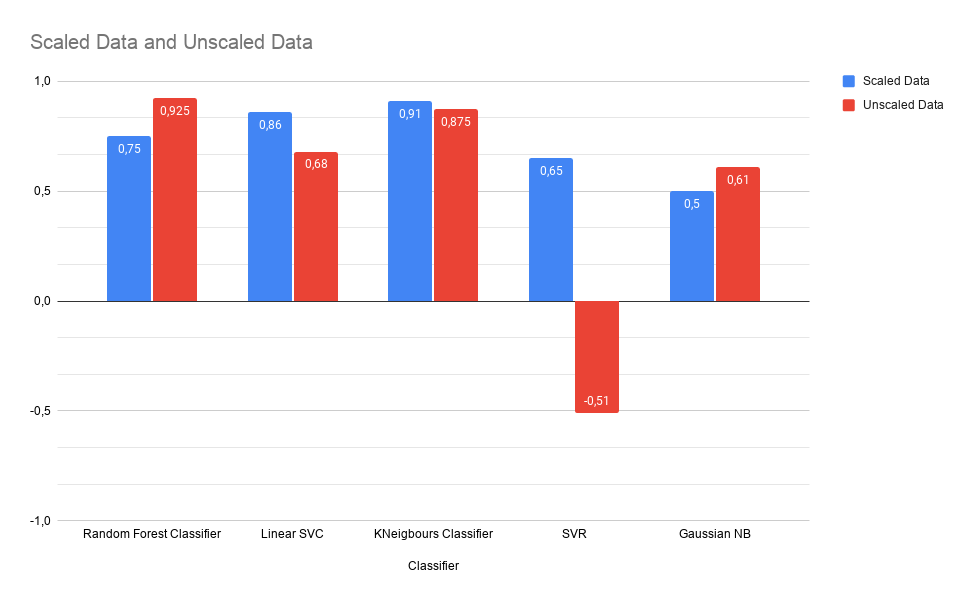

### Conclusions

The issue of fakes profiles is not only a simple problem of social networks in general, above that, it costs companies and also, in certain cases, can compromise the experience of certain users on the platform. Obviously, social media companies care about their users and, for that, they have increasingly invested in Data Science technologies in order to improve their customers' experience.

Today we saw how to use Machine Learning to detect fake profiles on instagram, with a good detection result, just over 92.5% accuracy rate, which I think is excellent, but it can improve.

**I leave the challenge to you, what do you think about improving this model?**